In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from tabulate import tabulate
import numpy as np
import seaborn as sns
import time

In [2]:
#imports 2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score


In [3]:
X_train = pd.read_csv("base_xtrain.csv")
X_test = pd.read_csv("base_xtest.csv")
y_train = pd.read_csv("base_ytrain.csv")
y_test = pd.read_csv("base_ytest.csv")

In [4]:
X_train.drop(columns=['Unnamed: 0'], inplace=True)
X_test.drop(columns=['Unnamed: 0'], inplace=True)
y_train.drop(columns=['Unnamed: 0'], inplace=True)
y_test.drop(columns=['Unnamed: 0'], inplace=True)

In [5]:
def parametros_grid(name):
    print("Melhores parâmetros para BaggingClassifier: ", name.best_params_)
    print("Melhor precisão: ", name.best_score_)

### INICIANDO MODELAGEM

In [6]:
#testando modelo antes do balanceamento
#Iremos comparar o precision e o recall antes e depois do balanceamento, para sabermos se deu certo
#importando modelo}
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
#defininfo classificador
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Configuração do Grid Search
clf = GridSearchCV(estimator=DecisionTreeClassifier(random_state=1), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
clf.fit(X_train, y_train)


Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             verbose=2)

In [7]:
parametros_grid(clf)

Melhores parâmetros para BaggingClassifier:  {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Melhor precisão:  0.7315435125233396


In [8]:
y_pred_treino = clf.predict(X_train)

In [9]:
#prev do resultado
y_pred = clf.predict(X_test)

In [10]:
from sklearn.metrics import accuracy_score
accuracy_bf = accuracy_score(y_test, y_pred)

print("Acurácia do modelo de Arvore de decisão:", accuracy_bf)

Acurácia do modelo de Arvore de decisão: 0.8303318494536625


In [11]:
from sklearn.metrics import precision_score
precision_score(y_test,y_pred)

0.2275607180570222

In [12]:
from sklearn.metrics import recall_score
#verificando recall
recall_score(y_test,y_pred)

0.6682170542635659

In [13]:
from sklearn.metrics import confusion_matrix
#gerando matriz de confusão
confusion_matrix(y_test,y_pred)

array([[ 431,  214],
       [1463, 7776]], dtype=int64)

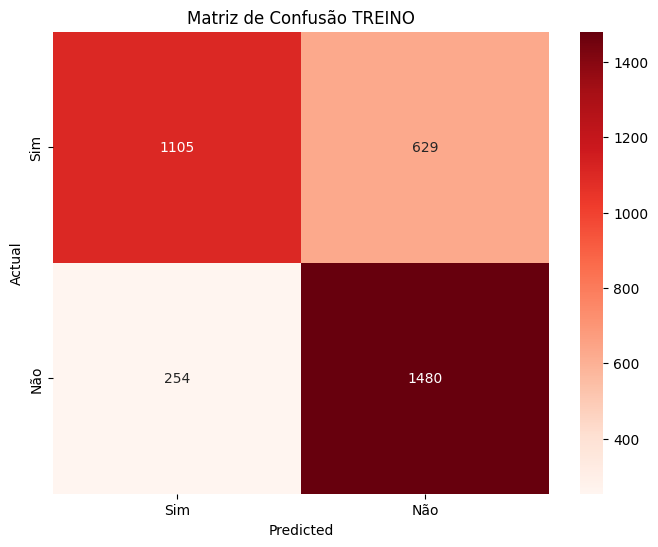

In [14]:
# Calculando a matriz de confusão
cm = confusion_matrix(y_train, y_pred_treino)

# Plotando a matriz de confusão como um heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Reds', fmt='g', xticklabels=['Sim', 'Não'], 
            yticklabels=['Sim', 'Não']) 
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusão TREINO')
plt.show()

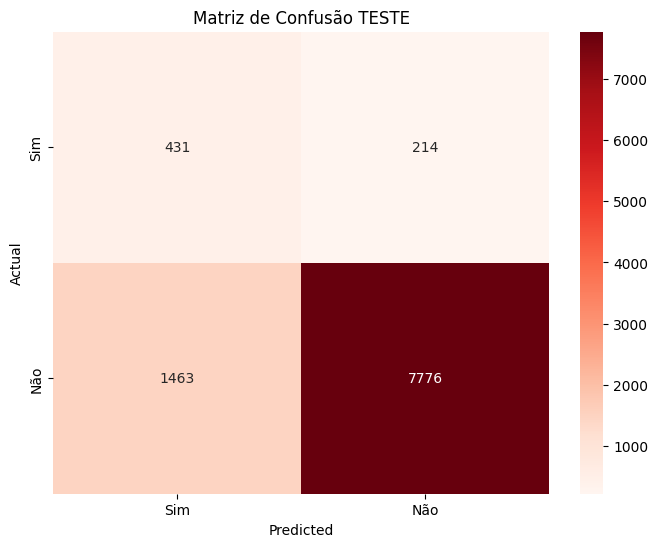

In [15]:
# Calculando a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plotando a matriz de confusão como um heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Reds', fmt='g', xticklabels=['Sim', 'Não'], 
            yticklabels=['Sim', 'Não']) 
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusão TESTE')
plt.show()

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.23      0.67      0.34       645
         2.0       0.97      0.84      0.90      9239

    accuracy                           0.83      9884
   macro avg       0.60      0.75      0.62      9884
weighted avg       0.92      0.83      0.87      9884



In [17]:
#MODELO DE TREINO
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(classification_report(y_train, y_pred_treino))

              precision    recall  f1-score   support

         1.0       0.81      0.64      0.71      1734
         2.0       0.70      0.85      0.77      1734

    accuracy                           0.75      3468
   macro avg       0.76      0.75      0.74      3468
weighted avg       0.76      0.75      0.74      3468



In [18]:
"""from sklearn.tree import plot_tree

# Convertendo os nomes das colunas para uma lista de strings
feature_names = list(X_test.columns)

# Plotando a árvore de decisão
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=feature_names, class_names=['Não Depressão', 'Depressão'], filled=True)
plt.show()"""

"from sklearn.tree import plot_tree\n\n# Convertendo os nomes das colunas para uma lista de strings\nfeature_names = list(X_test.columns)\n\n# Plotando a árvore de decisão\nplt.figure(figsize=(20,10))\nplot_tree(clf, feature_names=feature_names, class_names=['Não Depressão', 'Depressão'], filled=True)\nplt.show()"

### RANDOM FOREST

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score, KFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [20]:
X_train.shape

(3468, 19)

In [21]:
from sklearn.ensemble import RandomForestClassifier
# Parâmetros a serem testados
param_grid = {
    'n_estimators': [10,30, 100],
    'criterion': ['gini', 'entropy'],
    'max_features': [1, 2, 3, 4],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Configuração do Grid Search
rf = GridSearchCV(estimator=RandomForestClassifier(random_state=1), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
rf.fit(X_train, y_train)

Fitting 5 folds for each of 864 candidates, totalling 4320 fits


c:\Users\Pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 30, 100]},
             verbose=2)

In [22]:
parametros_grid(rf)

Melhores parâmetros para BaggingClassifier:  {'criterion': 'entropy', 'max_depth': 10, 'max_features': 1, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Melhor precisão:  0.7427910226181119


In [23]:
y_predRF = rf.predict(X_test)

In [24]:
y_pred_treino_RF = rf.predict(X_train)

In [25]:
from sklearn.metrics import accuracy_score
accuracy_bf = accuracy_score(y_test, y_predRF)

print("Acurácia do modelo de Random Forest:", accuracy_bf)

Acurácia do modelo de Random Forest: 0.787838931606637


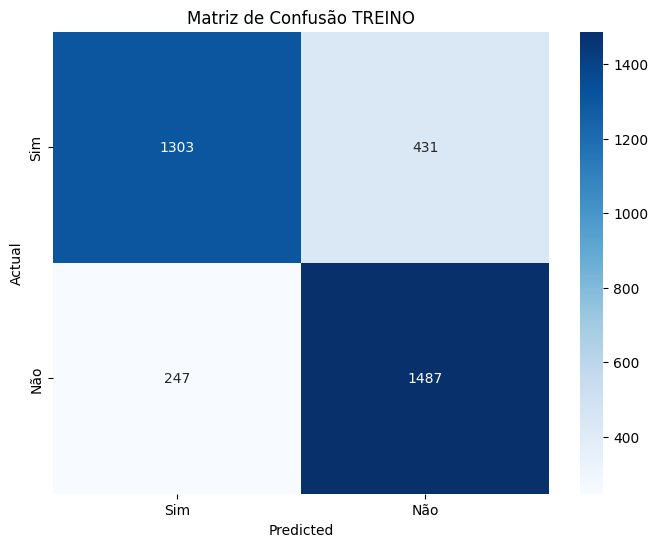

In [26]:
# Calculando a matriz de confusão
cm = confusion_matrix(y_train, y_pred_treino_RF)

# Plotando a matriz de confusão como um heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Sim', 'Não'], 
            yticklabels=['Sim', 'Não']) 
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusão TREINO')
plt.show()

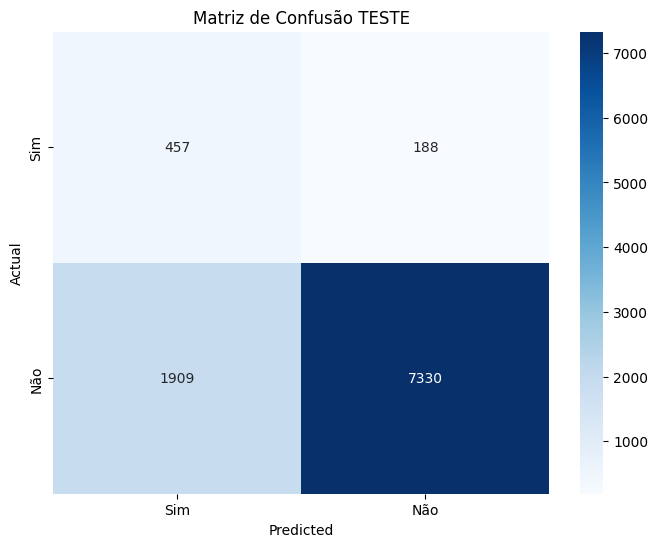

In [27]:
# Calculando a matriz de confusão
cm = confusion_matrix(y_test, y_predRF)

# Plotando a matriz de confusão como um heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Sim', 'Não'], 
            yticklabels=['Sim', 'Não']) 
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusão TESTE')
plt.show()

In [28]:
print(classification_report(y_test, y_predRF))

              precision    recall  f1-score   support

         1.0       0.19      0.71      0.30       645
         2.0       0.97      0.79      0.87      9239

    accuracy                           0.79      9884
   macro avg       0.58      0.75      0.59      9884
weighted avg       0.92      0.79      0.84      9884



In [29]:
#MODELO DE TREINO
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(classification_report(y_train, y_pred_treino_RF))

              precision    recall  f1-score   support

         1.0       0.84      0.75      0.79      1734
         2.0       0.78      0.86      0.81      1734

    accuracy                           0.80      3468
   macro avg       0.81      0.80      0.80      3468
weighted avg       0.81      0.80      0.80      3468



### NAIVE

In [30]:
from sklearn.naive_bayes import GaussianNB
modelo = GaussianNB()

In [31]:
modelo.fit(X_train, y_train)

c:\Users\Pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [32]:
previsoes = modelo.predict(X_test)

In [33]:
y_pred_treino_NB = modelo.predict(X_train)

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_test,previsoes)

0.8445973290165925

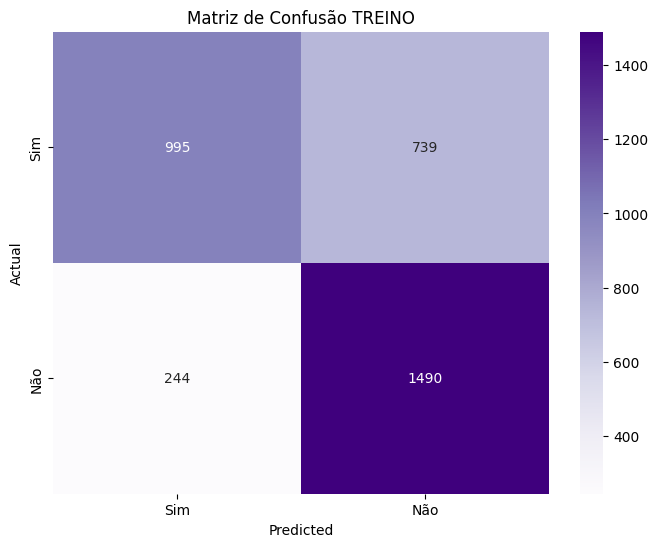

In [35]:
# Calculando a matriz de confusão
cm = confusion_matrix(y_train, y_pred_treino_NB)

# Plotando a matriz de confusão como um heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Purples', fmt='g', xticklabels=['Sim', 'Não'], 
            yticklabels=['Sim', 'Não']) 
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusão TREINO')
plt.show()

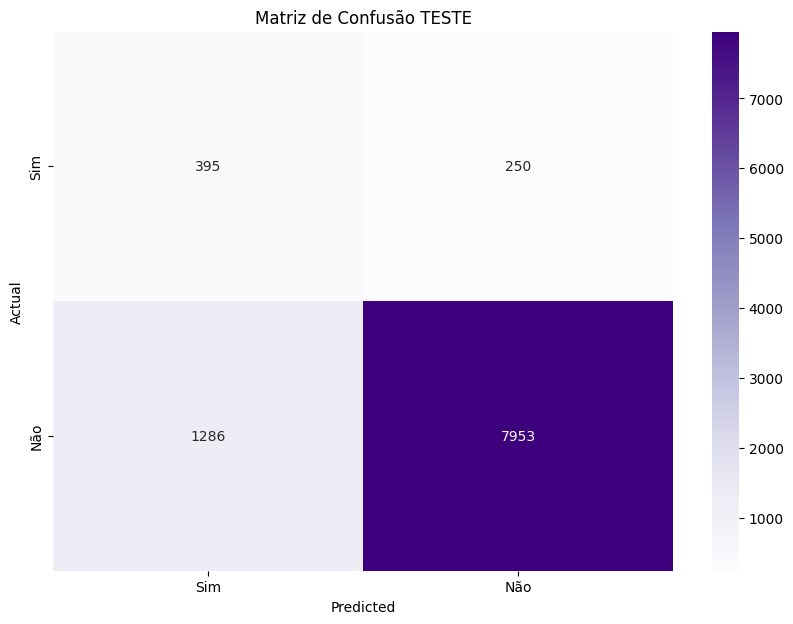

In [36]:
# Cálculo da matriz de confusão
cm = confusion_matrix(y_test, previsoes)

# Plotando a matriz de confusão com a cor roxa
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, cmap='Purples', fmt='g', xticklabels=['Sim', 'Não'], 
            yticklabels=['Sim', 'Não']) 
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusão TESTE')
plt.show()

In [37]:
print(classification_report(y_test, previsoes))

              precision    recall  f1-score   support

         1.0       0.23      0.61      0.34       645
         2.0       0.97      0.86      0.91      9239

    accuracy                           0.84      9884
   macro avg       0.60      0.74      0.63      9884
weighted avg       0.92      0.84      0.87      9884



In [38]:
#MODELO DE TREINO
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(classification_report(y_train, y_pred_treino_NB))

              precision    recall  f1-score   support

         1.0       0.80      0.57      0.67      1734
         2.0       0.67      0.86      0.75      1734

    accuracy                           0.72      3468
   macro avg       0.74      0.72      0.71      3468
weighted avg       0.74      0.72      0.71      3468



## TESTANDO OUTROS MODELOS

#### REDE NEURAL

In [39]:
from sklearn.neural_network import MLPClassifier

# Parâmetros a serem testados
param_grid = {
    'solver': ['lbfgs', 'sgd', 'adam'],
    'hidden_layer_sizes': [(20,), (20, 10), (30, 20, 10)],
    'alpha': [1e-5, 1e-4, 1e-3],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}

# Configuração do Grid Search
rede_neural = GridSearchCV(estimator=MLPClassifier(max_iter=200, random_state=1), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
rede_neural.fit(X_train, y_train)



Fitting 5 folds for each of 81 candidates, totalling 405 fits


c:\Users\Pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5, estimator=MLPClassifier(random_state=1), n_jobs=-1,
             param_grid={'alpha': [1e-05, 0.0001, 0.001],
                         'hidden_layer_sizes': [(20,), (20, 10), (30, 20, 10)],
                         'learning_rate': ['constant', 'invscaling',
                                           'adaptive'],
                         'solver': ['lbfgs', 'sgd', 'adam']},
             verbose=2)

In [40]:
parametros_grid(rede_neural)

Melhores parâmetros para BaggingClassifier:  {'alpha': 1e-05, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'solver': 'lbfgs'}
Melhor precisão:  0.707906566696192


In [41]:
y_predRNA = rede_neural.predict(X_test)

y_trainRNA = rede_neural.predict(X_train)

In [42]:
accuracy_score(y_test,y_predRNA)

0.9319101578308377

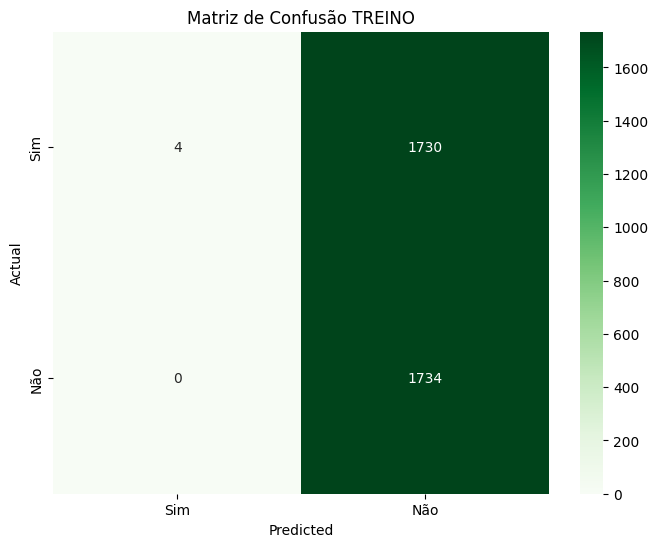

In [43]:
# Calculando a matriz de confusão
cm = confusion_matrix(y_train, y_trainRNA)

# Plotando a matriz de confusão como um heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Greens', fmt='g', xticklabels=['Sim', 'Não'], 
            yticklabels=['Sim', 'Não']) 
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusão TREINO')
plt.show()

In [44]:
#MODELO DE TREINO
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(classification_report(y_train, y_trainRNA))

              precision    recall  f1-score   support

         1.0       1.00      0.00      0.00      1734
         2.0       0.50      1.00      0.67      1734

    accuracy                           0.50      3468
   macro avg       0.75      0.50      0.34      3468
weighted avg       0.75      0.50      0.34      3468



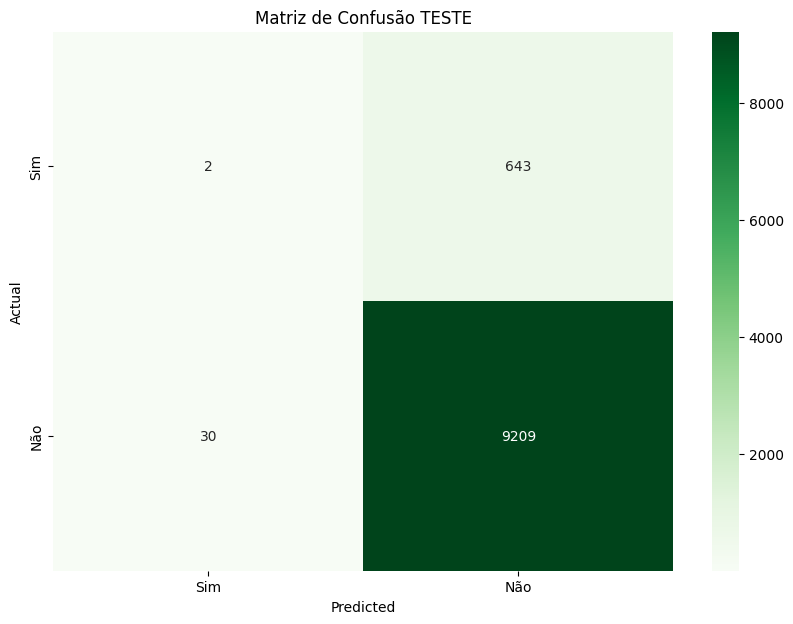

In [45]:
# Cálculo da matriz de confusão
cm = confusion_matrix(y_test, y_predRNA)

# Plotando a matriz de confusão com a cor roxa
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, cmap='Greens', fmt='g', xticklabels=['Sim', 'Não'], 
            yticklabels=['Sim', 'Não']) 
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusão TESTE')
plt.show()

In [46]:
#MODELO DE TESTE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(classification_report(y_test, y_predRNA))

              precision    recall  f1-score   support

         1.0       0.06      0.00      0.01       645
         2.0       0.93      1.00      0.96      9239

    accuracy                           0.93      9884
   macro avg       0.50      0.50      0.49      9884
weighted avg       0.88      0.93      0.90      9884



#### BAGGING

In [50]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [49]:
pip install BaggingClassifier

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement BaggingClassifier (from versions: none)
ERROR: No matching distribution found for BaggingClassifier


In [52]:
bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(), n_estimators=10, random_state=1
)

In [54]:
bagging.fit(X_train, y_train)
y_predBAG = bagging.predict(X_test)

y_trainBAG = bagging.predict(X_train)

c:\Users\Pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_bagging.py:888: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


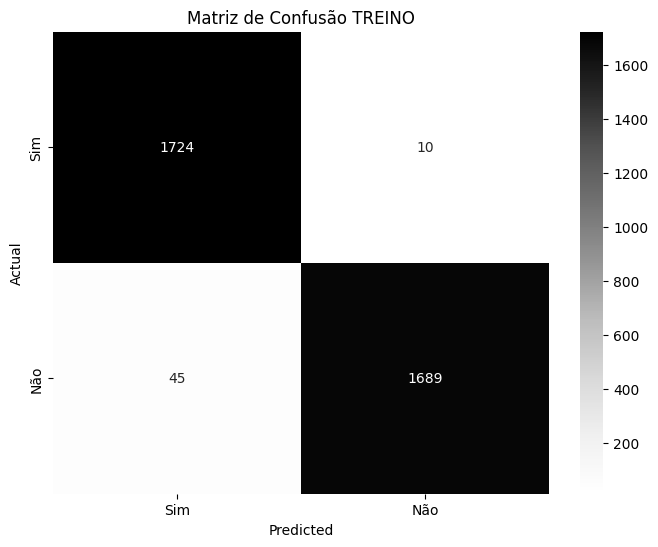

In [55]:
# Calculando a matriz de confusão
cm = confusion_matrix(y_train, y_trainBAG)

# Plotando a matriz de confusão como um heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Greys', fmt='g', xticklabels=['Sim', 'Não'], 
            yticklabels=['Sim', 'Não']) 
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusão TREINO')
plt.show()

In [56]:
#MODELO DE TREINO
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(classification_report(y_train, y_trainBAG))

              precision    recall  f1-score   support

         1.0       0.97      0.99      0.98      1734
         2.0       0.99      0.97      0.98      1734

    accuracy                           0.98      3468
   macro avg       0.98      0.98      0.98      3468
weighted avg       0.98      0.98      0.98      3468



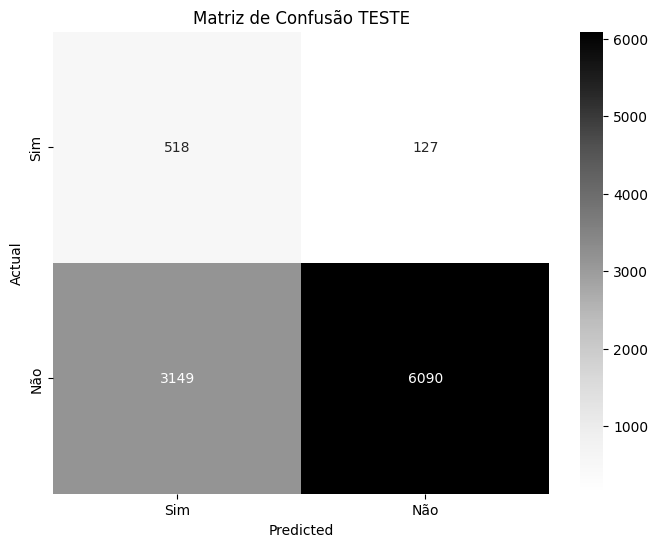

In [57]:
# Calculando a matriz de confusão
cm = confusion_matrix(y_test, y_predBAG)

# Plotando a matriz de confusão como um heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Greys', fmt='g', xticklabels=['Sim', 'Não'], 
            yticklabels=['Sim', 'Não']) 
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusão TESTE')
plt.show()

In [58]:
#MODELO DE TREINO
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(classification_report(y_test, y_predBAG))

              precision    recall  f1-score   support

         1.0       0.14      0.80      0.24       645
         2.0       0.98      0.66      0.79      9239

    accuracy                           0.67      9884
   macro avg       0.56      0.73      0.51      9884
weighted avg       0.92      0.67      0.75      9884



## Cross Validation

In [59]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [60]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)

### CURVA ROC

In [62]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(y_train, y_train)
    plt.plot(fpr, tpr)
    plt.xlabel('Taxa Falso Positivo')
    plt.ylabel('Taxa Verdadeiro Positive Rate')

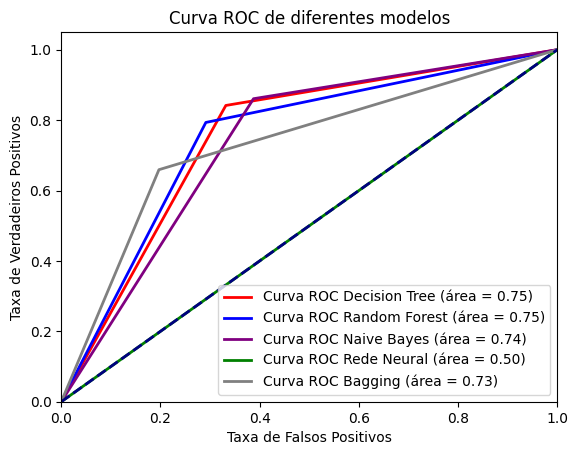

In [63]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Ajustar os valores para que sejam binários (0 e 1)
y_test_bin = y_test - 1

# Calcular as pontuações das previsões de probabilidade para cada modelo
# Para Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test_bin, y_pred, pos_label=1)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Para Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test_bin, y_predRF, pos_label=1)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Para Naive Bayes
fpr_nb, tpr_nb, _ = roc_curve(y_test_bin, previsoes, pos_label=1)
roc_auc_nb = auc(fpr_nb, tpr_nb)

# Para Rede Neural
fpr_rna, tpr_rna, _ = roc_curve(y_test_bin, y_predRNA, pos_label=1)
roc_auc_rna = auc(fpr_rna, tpr_rna)

# Para Bagging
fpr_bag, tpr_bag, _ = roc_curve(y_test_bin, y_predBAG, pos_label=1)
roc_auc_bag = auc(fpr_bag, tpr_bag)

# Plotar as curvas ROC
plt.figure()
plt.plot(fpr_dt, tpr_dt, color='red', lw=2, label='Curva ROC Decision Tree (área = %0.2f)' % roc_auc_dt)
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='Curva ROC Random Forest (área = %0.2f)' % roc_auc_rf)
plt.plot(fpr_nb, tpr_nb, color='purple', lw=2, label='Curva ROC Naive Bayes (área = %0.2f)' % roc_auc_nb)
plt.plot(fpr_rna, tpr_rna, color='green', lw=2, label='Curva ROC Rede Neural (área = %0.2f)' % roc_auc_rna)
plt.plot(fpr_bag, tpr_bag, color='grey', lw=2, label='Curva ROC Bagging (área = %0.2f)' % roc_auc_bag)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC de diferentes modelos')
plt.legend(loc="lower right")
plt.show()


In [64]:
def feauture_importancia (modelo,base_usada,cor_):
     # Calcular e visualizar a importância das features
    feature_importance = pd.Series(modelo.feature_importances_, index=base_usada.columns)
    feature_importance_sorted = feature_importance.sort_values(ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importance_sorted, y=feature_importance_sorted.index, palette=cor_)
    plt.xlabel('Importância das Features')
    plt.ylabel('Features')
    plt.title('Importância das Features')
    plt.show()

In [66]:
#verificando atributos da Arvore
feauture_importancia(clf,X_test,'autumn')

AttributeError: 'GridSearchCV' object has no attribute 'feature_importances_'

In [67]:
#verificando atributos da Arvore
feauture_importancia(rf,X_test,'winter')

AttributeError: 'GridSearchCV' object has no attribute 'feature_importances_'